### Шваб Кирилл, J41112  
# <center>Лабораторная работа №1</center>
 <center>Вариант 15</center>

Реализуйте собственный генератор случайной выборки с функцией распределения $F(x)$:

$$p(x):=\chi_{[0,1]}(x) \cdot x^4 $$


### 1. Проверьте выполнение условия нормировки. Нормируйте соответствующим образом, если условие нарушается.

 Функция распределения случайной величины имеет следующий вид:
$$F(x)=\begin{cases} 0 \quad\text{, если } x<0\\
x^4 \quad\text{, если } x \in [0,1]\\
1 \quad\text{, если } x>1\\
\end{cases}$$

Функция плотности распределения случайной величины имеет следующий вид:
 
$$ p(x)=\begin{cases} 0 \quad\text{, если } x<0\\
4x^3 \quad\text{, если } x \in [0,1]\\
0 \quad\text{, если } x>1\\
\end{cases}$$

Геометрический смысл условия нормировки — площадь под кривой плотности распределения равна единице. То есть интеграл от функции должен быть равен единице.
$$\int_{0}^{1} 4x^3dx+\int_{-∞}^{0}0dx+\int_{1}^{+∞}0dx=(1-0)+0+0=1$$

Таким образом, площадь под нашей функцией плотности равна единице и условие нормировки сохраняется.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from numpy.random import uniform

Создадим функции распределения и плотности распределения случайных величин

In [2]:
%%time
# Начало и конец отрезка функции плотности распределения
A, B = 0, 1

def pdf_function(x: float):
    """Фукнция плотности распределения случайной величины"""
    global A, B
    if x >= A and x <= B:
        return 4*pow(x, 3)
    else:
        return 0

def cdf_function(x: float):
    """"Функция распределения случайной величины"""
    global A, B
    if x<A:
        return 0
    elif x >= A and x <= B:
        return pow(x,4)
    else:
        return 1


# для удобства + немного скорости используем векторизацию
pdf = np.vectorize(pdf_function,otypes=[float])  
cdf = np.vectorize(cdf_function,otypes=[float])  

margin = 0.1 # отступ в рамках отрезка [A, B]
interval = np.linspace(A - margin,B + margin , num=10**3) # наш интервал значений
pdf_x = pdf(interval) # значения плотности распределения
cdf_x = cdf(interval) # значения функции распределения

Wall time: 2 ms


Проверим геометрическое условие нормировки численно

In [3]:
# расчитаем интеграл для фукнции плотности
integrate.quad(pdf_function, A, B) 

(1.0, 1.1102230246251565e-14)

## 2. Постройте график фукнции распределения

 Функция распределения случайной величины имеет следующий вид:
$$F(x)=\begin{cases} 0 \quad\text{, если } x<0\\
x^4 \quad\text{, если } x \in [0,1]\\
1 \quad\text{, если } x>1\\
\end{cases}$$

Изобразим функцию плотности распределения и функцию распределения

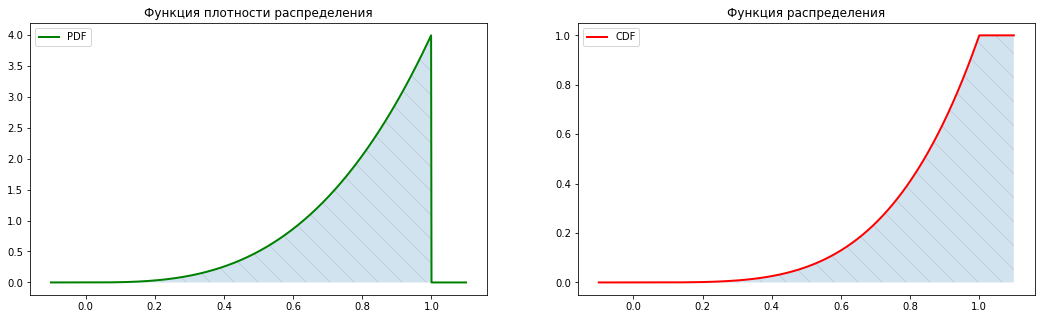

In [4]:
plt.figure(figsize=(18,5))

plt.subplot(1, 2, 1)
plt.title('Функция плотности распределения')
plt.plot(interval, pdf_x, linewidth=2, color='green',
         label='PDF')
plt.fill_between(interval, pdf_x, hatch='\\', edgecolor ='gray', linewidth=0.0,alpha=0.2)
plt.legend(loc = 'best')


plt.subplot(1, 2, 2)
plt.title('Функция распределения')
plt.plot(interval, cdf_x, color='red', linewidth=2,
         label='CDF')
plt.legend(loc = 'best')
plt.fill_between(interval, cdf_x, hatch='\\', edgecolor ='gray', linewidth=0.0,alpha =0.2)
plt.show()

## 3. Сгенерируйте выборку из 
- 10 элементов
- 100 элементов
- 1000 элементов

 Для того, чтобы сгенерировать выборку по заданному закону распределения необходимо получить обратную функцию от текущей функции распределения случайной величины:
$$y=F^{-1}(x)=\begin{cases} 0 \quad\text{, если } x<0\\
\pm x^\frac{1}{4} \in[0; 1]\\
1 \quad\text{, если } x>1
\end{cases}$$

In [5]:
# Границы отрезка для обратной функции
A_INV = 0
B_INV = 1

def idf_function(x):
    """обратная функция распределения"""
    global A_INV, B_INV
    if x >= A_INV and x <=B_INV:
        if x >= 0:
            return pow(x,1/4)
        if x < 0:
            return -pow(abs(x),0.25)
    elif x < A_INV:
        return A
    elif x > B_INV:
        return B

In [6]:
# для удобства + немного скорости используем векторизацию
idf = np.vectorize(idf_function,otypes=[float]) 

# интервал прорисовки обратной функции
inverse_interval = np.linspace(A_INV - margin,B_INV + margin , num=10**3)
idf_x = idf(inverse_interval)  # значения обратной функции распределения

Изобразим обратную функцию распределения

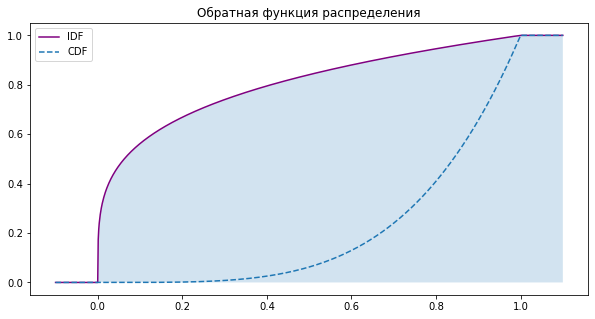

In [7]:
plt.figure(figsize=(10, 5))
plt.title('Обратная функция распределения')
plt.plot(inverse_interval, idf_x, color='purple',
         label='IDF')
plt.plot(interval, cdf_x, linestyle ='--',label = 'CDF')
plt.fill_between(inverse_interval, idf_x, linewidth=0.0,alpha =0.2)

plt.legend(loc='best')
plt.show()


In [8]:
# Генерация выборки размера number
def create_sample(number):
    """Создание набора из number элементов"""
    arr = [idf_function(x) for x in uniform(A_INV, B_INV, number)]
    print(f'Создан набор из {number} элементов')
    return arr

samples = [create_sample(i) for i in [10, 100, 1000, 10**6]]  # список выборок

Создан набор из 10 элементов
Создан набор из 100 элементов
Создан набор из 1000 элементов
Создан набор из 1000000 элементов


## 4. Постройте гистограмму частот для выборки из предыдущего пункта и сравните ее с плотностью распределения

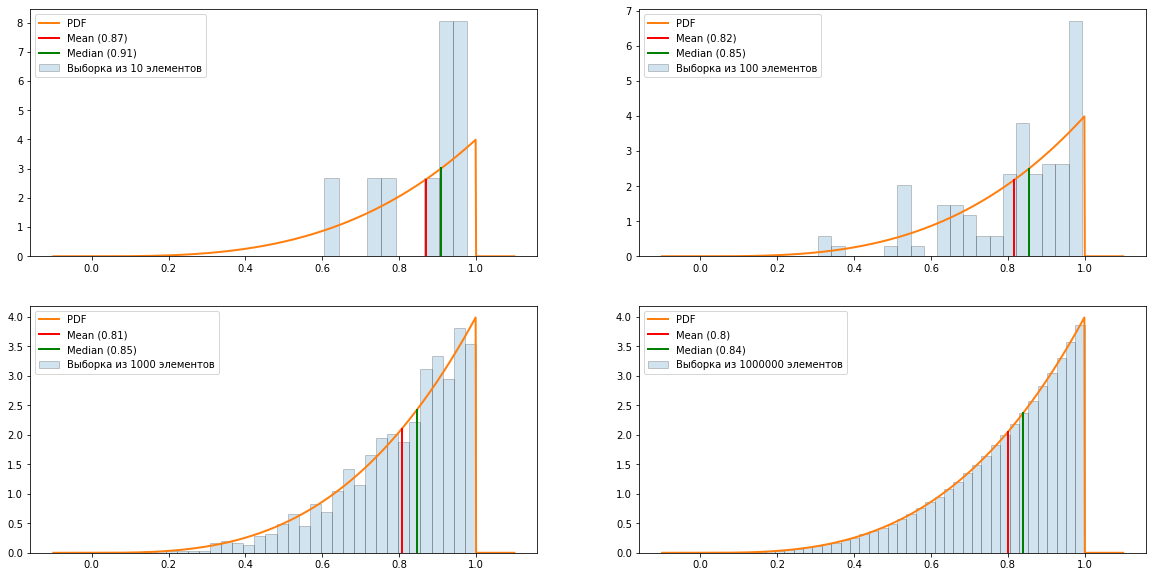

In [50]:
plt.figure(figsize=(20, 10))
for i in range(1, 5):
    plt.subplot(2, 2, i)
    plt.hist(samples[i-1], 10+(i-1)*10,density=True, alpha=0.2, ec='black',
             label=f'Выборка из {len(samples[i-1])} элементов')
    plt.plot(interval, pdf_x, linewidth=2, label='PDF')
    x_mean = np.mean(samples[i-1])
    x_median = np.median(samples[i-1])
    plt.plot([x_mean,x_mean],[0,pdf_function(x_mean)],linewidth=2,color='red', label =f'Mean ({round(x_mean,2)})')
    plt.plot([x_median,x_median],[0,pdf_function(x_median)],linewidth=2,color='green', label =f'Median ({round(x_median,2)})')
    plt.legend(loc='best')


## 5. Напишите функцию, которая будет выводить следующую статистику по выборке: 
- минимальное/ максимальное значение; 
- размах; 
- среднее; 
- выборочную дисперсию (с поправкой и без); 
- среднеквадратическое отклонение; 
- медиану; 
- 25%-ную и 75%-ную квантили; 
- коэффициент вариации; 
- коэффициент асимметрии; 
- коэффициент эксцесса

In [21]:
from scipy.stats import variation, kurtosis, skew


def statistic_info(arr: np.array):
    """Возвращение словаря описательной статистики по набору данных"""
    book = dict()
    book['Минимальное значение'] = arr.min()
    book['Максимальное значение'] = arr.max()
    book['Размах'] = arr.max() - arr.min()
    book['Мат. ожидание'] = arr.mean()
    book['Дисперсия'] = arr.var()
    book['Среднеквадратичное отклонение'] = arr.std()
    book['Медиана'] = np.median(arr) 
    book['25% квантиль'] = np.quantile(arr, 0.25)
    book['75% квантиль'] = np.quantile(arr, 0.75)
    book['Коэффициент вариации'] = variation(arr)
    book['Коэффициент асимметрии'] = skew(arr)
    book['Коэффициент эксцесса'] = kurtosis(arr)

    return book


In [30]:
def show_sample(index):
    """Вывод описательной статистики по набору данных"""
    global samples
    print('='*35)
    print(f'ВЫБОРКА ИЗ {len(samples[index])} ЭЛЕМЕНТОВ')
    print('='*35)
    print(*[f'{k} : {v}' for k,
            v in statistic_info(np.array(samples[index])).items()], sep='\n')


In [31]:
show_sample(0)

ВЫБОРКА ИЗ 10 ЭЛЕМЕНТОВ
Минимальное значение : 0.605059574119697
Максимальное значение : 0.9775731269919826
Размах : 0.3725135528722856
Мат. ожидание : 0.8686336460316525
Дисперсия : 0.013089551366493885
Среднеквадратичное отклонение : 0.11440957724986962
Медиана : 0.9094456950645757
25% квантиль : 0.8042079535033332
75% квантиль : 0.9542161044180358
Коэффициент вариации : 0.13171211795968193
Коэффициент асимметрии : -1.1408158997210889
Коэффициент эксцесса : 0.17262644102708657


In [32]:
show_sample(1)

ВЫБОРКА ИЗ 100 ЭЛЕМЕНТОВ
Минимальное значение : 0.3067796440279863
Максимальное значение : 0.9923009859814497
Размах : 0.6855213419534634
Мат. ожидание : 0.8152116687777239
Дисперсия : 0.025965739444834178
Среднеквадратичное отклонение : 0.16113888247357985
Медиана : 0.8537477432410244
25% квантиль : 0.7129185434930825
75% квантиль : 0.9417220204288866
Коэффициент вариации : 0.19766508337053268
Коэффициент асимметрии : -1.1213984836997573
Коэффициент эксцесса : 0.6747750288994707


In [33]:
show_sample(2)

ВЫБОРКА ИЗ 1000 ЭЛЕМЕНТОВ
Минимальное значение : 0.13528722317468161
Максимальное значение : 0.999603520229573
Размах : 0.8643162970548914
Мат. ожидание : 0.8064430883432114
Дисперсия : 0.024690316401295122
Среднеквадратичное отклонение : 0.15713152580336998
Медиана : 0.8463546985415015
25% квантиль : 0.7238619108762423
75% квантиль : 0.9295320523434034
Коэффициент вариации : 0.19484515159797228
Коэффициент асимметрии : -1.1126975506108556
Коэффициент эксцесса : 0.9997211642390793
